# Conceptos fundamentales de teoría de grafo

Juan Sosa PhD

Email [jcsosam@unal.edu.co](mailto:jcsosam@unal.edu.co)

GitHub https://github.com/jstats1702

Traducción a Python: Samuel H. Sánchez

Email [ssanchezgu@unal.edu.co](mailto:ssanchezgu@unal.edu.co)

GitHub https://github.com/Samuel-col

In [1]:
# pip install igraph
import igraph as gr
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## 1. Grafos y Subgrafos

Un **grafo** $G = (V, E)$ es una estructura que consiste de un conjunto de **vértices** (nodos) $V$ y de un conjunto de **aristas** (enlaces) $E$, donde los elementos de $E$ son parejas de la forma $e=\{u,v\}$, con $u,v\in V$. 

### Subgrafos

Un grafo $G'=(V',E')$ es un **subgrafo** de $G=(V,E)$ si $V'\subset V$ y $E'\subset E$.

<img src='subgraph.png' width = 600\>

## Isomorfismo

Dos grafos que son **equivalentes estructuralmente** (a pesar de las etiquetas de los vértices) se denominan **isomorfos**. 

Dos grafos $G_1 = (V_1, E_1)$ y $G_2 = (V_2, E_2)$ son **isomorfos**, lo que se escribe $G_1 \equiv G_2$, si existe una biyección $\varphi:V_1\longrightarrow V_2$ tal que $\{u,v\}\in E_1$ si y solo si $\{\varphi(u),\varphi(v)\}\in E_2$.

<img src='iso0.jpg' width = 600\>

Si $G_1 \equiv G_2$, entonces $|V_1| = |V_2|$ y $|E_1| = |E_2|$.

Si $|V_1| \neq |V_2|$ o $|E_1| \neq |E_2|$, entonces $G_1 \not\equiv G_2$.

Si $G_1 \equiv G_2$ y $\{u,v\}\notin E_1$, entonces $\{\varphi(u),\varphi(v)\}\notin E_2$.

### Ejemplo

¿$G_1$ y $G_2$ son isomorfos?

<img src='iso1.png' width = 600\>

In [2]:
# grafos
g1 = gr.Graph.Formula("0-1, 1-2, 2-3, 3-4, 4-0")
g2 = gr.Graph.Formula("a-c, a-d, b-d, b-e, c-e")

In [3]:
# Isomorfos?
g1.isomorphic(g2)

True

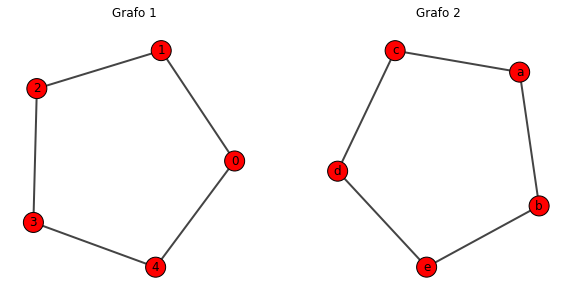

In [4]:
# visualización
def clean_plot_axes(axes): # Función para quetar los ejes en los gráficos
    for ax in axes:
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_xticks([])
        ax.set_yticks([])
#
np.random.seed(123)
f, axes = plt.subplots(1, 2, figsize = (10,5))
gr.plot(g1,target = axes[0],vertex_size = 20,vertex_label = range(5))
gr.plot(g2,target = axes[1],vertex_size = 20,vertex_label = ['a','b','c','d','e'])
axes[0].set_title('Grafo 1')
axes[1].set_title('Grafo 2')
clean_plot_axes(axes)

## 3. Adyacencia

### Vértives adyacentes

Se dice que dos vértices $u, v \in V$ son **adyacentes** (*adjacent*), lo que se denota con $u\sim v$, si $u$ y $v$ están conectados por alguna arista de $E$.


### Vértives asilados

Un vértice $v\in V$ se llama **asilado** (*isolated*) si $v\not\sim u$ para todo $u\in V$.

Un grafo se puede almacenar por medio de una matriz de aristas y una lista de vértices aislados. 


### Vértices incidentes

Un vértice $v \in V$ es **incidente** (*incident*) en una arista $e\in E$ si $e = \{v,u\}$ para algún $u\in V$. 

### Grado

El **grado** (*degree*) del vértice $v\in V$ se define como el número de aristas incidentes en $v$.

Para dígrafos, el **grado de entrada** (*in-degree*) y el **grado de salida** (*out-degree*) del vértice $v\in V$ se definen como el número de aristas que apuntan hacia dentro y hacia fuera de $v$, respectivamente.




### 3.1. Ejemplo

In [5]:
# red no dirigida (definición manual)
g = gr.Graph.Formula('0-1, 0-2, 1-2, 1-3, 2-4, 3-4, 3-5, 3-6, 4-5, 5-6')

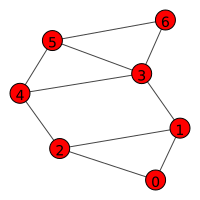

In [6]:
# visualización
np.random.seed(42)
g.vs['label'] = range(g.vcount())
gr.plot(g,bbox = (200,200))

In [7]:
# vecinos del vértices 0 (el primero)
g.neighbors(vertex = 0)

[1, 2]

In [8]:
# grados
g.degree()

[2, 3, 3, 4, 3, 3, 2]

### 3.2. Ejemplo

In [9]:
# red dirigida (definicion manual)
dg = gr.Graph.Formula('0->1, 0->2, 1<->2')

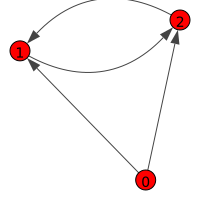

In [10]:
# visualizacion
np.random.seed(42)
dg.vs['label'] = range(dg.vcount())
gr.plot(dg,bbox = (200,200))

In [11]:
# grado de entrada
dg.degree(mode = 'in')

[0, 2, 2]

In [12]:
# grado de salida
dg.degree(mode = 'out')

[2, 1, 1]

## 4. Movimiento

### Caminata

Una **caminata** (*walk*) de $v_0$ a $v_\ell$ es una secuencia alternante $\{v_0,e_1,v_1,e_2,v_2,\ldots,v_{\ell-1},e_\ell,v_\ell\}$ donde los puntos extremos de $e_i$ son $\{v_{i-1}, v_i\}$ para $i=1,\ldots,\ell$. Se dice que la **longitud** de esta caminata es $\ell$. Pueden haber caminatas abiertas o cerradas.

- 1->2->3->4->3    es una caminata abierta. 
- 1->2->3->4->3->1 es una caminata cerrada.

<img src='walk.png' width = 200\>

### Sendero

Un **sendero** (*trail*) es una caminata abierta sin aristas repetidas (se pueden repetir vértices).

- 1->3->8->6->3->2 es un sendero. 

<img src='trail.png' width = 200\>

### Circuito

Un **circuito** (*circuit*) es una caminata cerrada sin aristas repetidas (se pueden repetir vértices). 

- 1->2->4->3->6->8->3->1 es un circuito.

<img src='circuit.png' width = 200\>

### Ciclo

Un **ciclo** (*cycle*) es una caminata cerrada con al menos tres aristas no repetidas y vértices intermedios son distintos.

- 1->2->4->3->1 es un ciclo. 

<img src='cycle.png' width = 200\>

Los grafos que no contienen ciclos se denominan **acíclicos** (*acycle*).

<!---
Se dice que un vértice $v$ es **accesible** desde otro vértice $u$ si existe una caminata desde $u$ hasta $v$. 

Se dice que un grafo está **conectado** si cada vértice es accesible desde todos los demás. 
-->



## 5. Conectividad

Se dice que un vértice $v$ es **accesible** (*reachable*) desde otro vértice $u$ si existe una caminata desde $u$ hasta $v$. 

Se dice que un grafo está **conectado** (*connected*) si cada vértice es accesible desde todos los demás. 


### Ejemplo: grafos conectados con 5 vértices

<img src='connectedG5.png' width = 500\>


Una **componente** (*component*) de un grafo es un subgrafo conectado maximalmente, i.e., un subgrafo al que añadirle cualquier otro vértice arruina la conectividad.


### 5.2. Ejemplo

In [13]:
# red no dirigida
g = gr.Graph.Formula("0-6, 1-6, 1-3, 2-5, 3-6, 4-10, 5-11, 6-7, 6-8, 6-9")

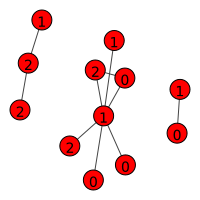

In [14]:
# visualizacion
np.random.seed(42)
g.vs['label'] = range(dg.vcount())
gr.plot(g,bbox = (200,200))

In [15]:
# conectado?
g.is_connected()

False

In [16]:
# components
g.components().membership

[0, 0, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0]

In [17]:
g.components().sizes()

[7, 3, 2]

In [18]:
g.components().summary()

'Clustering with 12 elements and 3 clusters'

Un digrafo está **conectado débilmente**  (*weakly connected*)   si el grafo subyacente (resultado de remover la direccionalidad) está conectado.

Un digrafo está **conectado fuertemente** (*strongly connected*) si cada vértice es accesible desde todos los demás mediante una caminata dirigida.



### 5.3. Ejemplo

In [19]:
# red dirigida (definicion manual)
dg = gr.Graph.Formula('0->1, 0->2, 1<->2')

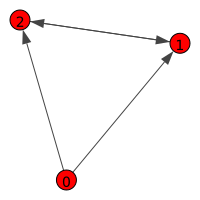

In [20]:
# visualizacion
dg.vs['label'] = range(dg.vcount())
gr.plot(dg,bbox = (200,200),autocurve = False)

In [21]:
# conectado debilmente?
dg.is_connected(mode = 'weak')

True

In [22]:
# conectado fuertemente?
dg.is_connected(mode = 'strong')

False

## 6. Distancia

La **distancia geodésica** entre dos vértices de un grafo es la longitud de la caminata más corta entre los vértices. 

La distancia se define como infinito si no existen caminatas entre los vértices.

El valor de la distancia más grande de un grafo se llama **diámetro** del grafo.

La **distancia geodésica promedio** es una medida del grado de separación de los vértices.

### 6.1. Ejemplo

In [23]:
# red no dirigida (definición manual)
g = gr.Graph.Formula('0-1, 0-2, 1-2, 1-3, 2-4, 3-4, 3-5, 3-6, 4-5, 5-6')

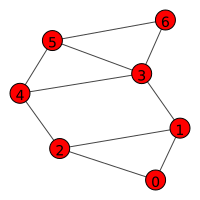

In [24]:
# visualización
g.vs['label'] = range(g.vcount())
gr.plot(g,bbox = (200,200))

In [25]:
# distancia
g.distances(source = 0, target = 5)

[[3]]

In [26]:
# caminata
g.get_shortest_paths(v = 0, to = 5)

[[0, 1, 3, 5]]

In [27]:
# caminatas
g.get_all_shortest_paths(v = 0, to = 5)

[[0, 2, 4, 5], [0, 1, 3, 5]]

In [28]:
# distancias
D = g.distances()
D = np.array(D)
D

array([[0, 1, 1, 2, 2, 3, 3],
       [1, 0, 1, 1, 2, 2, 2],
       [1, 1, 0, 2, 1, 2, 3],
       [2, 1, 2, 0, 1, 1, 1],
       [2, 2, 1, 1, 0, 1, 2],
       [3, 2, 2, 1, 1, 0, 1],
       [3, 2, 3, 1, 2, 1, 0]])

In [29]:
# diametro
g.diameter()

3

In [30]:
# diametro (otra manera)
ltri_i,ltri_j = np.tril_indices(D.shape[0],k=-1) # k = -1 para que tome los elementos bajo la diagonal principal
D_lower_vector = D[np.flip(6-ltri_i),np.flip(6-ltri_j)]
max(D_lower_vector)

3

In [31]:
# sendero
extremos = g.farthest_points()
# extremos es un a tripla que contiene: (id_del origen,id_del destino,longitud de la caminata)
d = g.get_shortest_paths(v = extremos[0], to = extremos[1])
d = d[0]
d

[0, 1, 3, 5]

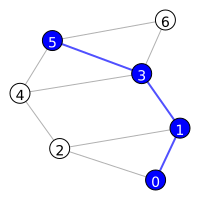

In [32]:
# visualizacion del diametro
visual_style = {}
## color de los vertices
v_color = np.array(['#ffffff']*g.vcount())
v_color[d] = '#0000ff'
v_lab_color = np.array(['#000000']*g.vcount())
v_lab_color[d] = '#ffffff'
## grueso de las aristas
path_edges = [(d[i],d[i+1]) for i in range(len(d)-1)]
e_width = [2 if (e.tuple in path_edges) else 1 for e in g.es]
## color de las aristas
e_color = ['#5050ff' if (e.tuple in path_edges) else '#b0b0b0' for e in g.es]
## quitar nombres
g.vs['label'] = range(g.vcount())
## grafico
np.random.seed(42)
gr.plot(g,vertex_color = v_color,edge_width = e_width,edge_color = e_color,
        vertex_label_color = v_lab_color,bbox = (200,200))

In [33]:
# distancia promedio (grado de separacion)
g.average_path_length()

1.6666666666666667

In [34]:
np.mean(D_lower_vector)

1.6666666666666667

In [35]:
# distribucion de las distancias
unique, counts = np.unique(D_lower_vector, return_counts=True)
pd.DataFrame(data = [counts],columns = unique)

,1,2,3
0,10,8,3


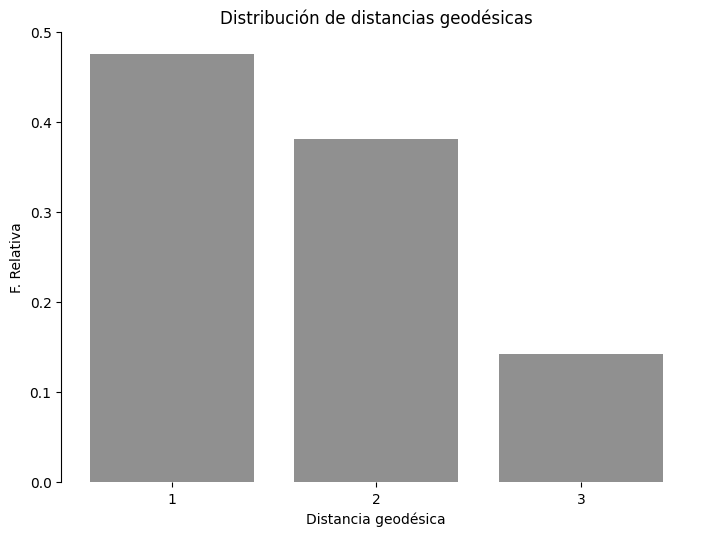

In [36]:
# visualizacion
senderos = counts
f = plt.figure(figsize = (7, 5),dpi = 100)
axes = f.add_axes([0.1, 0.1, 0.9, 0.9])
axes.bar(x = unique,height=senderos/sum(senderos), color = '#909090')
axes.set_xlabel('Distancia geodésica')
axes.set_ylabel('F. Relativa')
axes.set_title('Distribución de distancias geodésicas')
axes.set_xticks([1,2,3])
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.spines['bottom'].set_visible(False)
plt.show()

## Referencias

<p align="center">
<img width="400px" src="01_cover_KC.jpg">
</p>

<p align="center">
<img width="400px" src="01_cover_Luke.jpg">
</p>

<p align="center">
<img width="400px" src="01_cover_Menczer.jpg">
</p>

<p align="center">
<img width="400px" src="01_cover_AK.jpg">
</p>

<p align="center">
<img width="400px" src="01_cover_Newman.jpg">
</p>